In [1]:
import sys
import os

project_root = os.path.abspath("..")
src_path = os.path.join(project_root, "src")

if src_path not in sys.path:
    sys.path.insert(0, src_path)


In [2]:
import numpy as np
from algorithmic_arc.complexity.lib.conditional_ca_ctm import compute_conditional_ca_ctm

# === Shifts ===
def shift_right(mat, steps=1):
    return np.roll(mat, shift=steps, axis=1)

def shift_left(mat, steps=1):
    return np.roll(mat, shift=-steps, axis=1)

def shift_down(mat, steps=1):
    return np.roll(mat, shift=steps, axis=0)

def shift_up(mat, steps=1):
    return np.roll(mat, shift=-steps, axis=0)

def shift_diag_down_right(mat, steps=1):
    return np.roll(np.roll(mat, shift=steps, axis=0), shift=steps, axis=1)

def shift_diag_down_left(mat, steps=1):
    return np.roll(np.roll(mat, shift=steps, axis=0), shift=-steps, axis=1)

def shift_diag_up_right(mat, steps=1):
    return np.roll(np.roll(mat, shift=-steps, axis=0), shift=steps, axis=1)

def shift_diag_up_left(mat, steps=1):
    return np.roll(np.roll(mat, shift=-steps, axis=0), shift=-steps, axis=1)

# === New: Rotations (in 90-degree steps) ===
def rotate_clockwise(mat, k=1):
    """Rotate 90 degrees clockwise k times (k=1 means 90°, k=2 means 180°, etc.)"""
    return np.rot90(mat, -k)

def rotate_counterclockwise(mat, k=1):
    """Rotate 90 degrees counterclockwise k times (k=1 means 90°, k=2 means 180°, etc.)"""
    return np.rot90(mat, k)

# === New: Bit Inversion ===
def invert_bits(mat):
    """Assumes binary matrix of 0s and 1s"""
    return 1 - mat


In [3]:
import matplotlib.pyplot as plt

def plot_matrix_pair(x, y, k_val, m_val, index):
    fig, axes = plt.subplots(1, 2, figsize=(4, 2.5))
    cmap = plt.cm.binary

    for ax, mat, title in zip(axes, [x, y], ['Input $X$', 'Target $Y$']):
        ax.imshow(mat, cmap=cmap, vmin=0, vmax=1)
        ax.set_xticks(np.arange(-.5, mat.shape[1], 1), minor=True)
        ax.set_yticks(np.arange(-.5, mat.shape[0], 1), minor=True)
        ax.grid(which="minor", color="gray", linestyle='-', linewidth=1)
        ax.tick_params(which="both", bottom=False, left=False, labelbottom=False, labelleft=False)
        ax.set_title(title)

    plt.suptitle(f"Pair {index+1}\n$K(Y|X) = {k_val:.4f}$, $m(Y|X) = {m_val:.4f}$", fontsize=10)
    plt.tight_layout()
    plt.show()


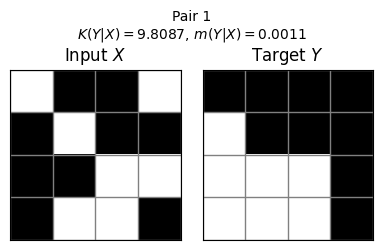

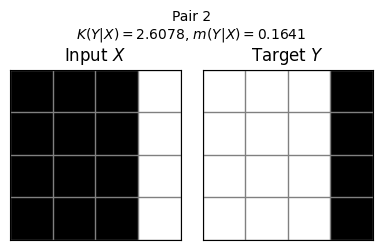

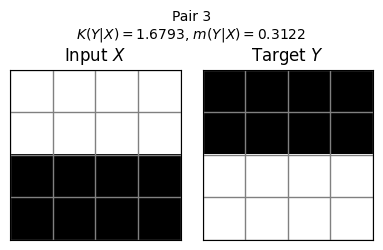

In [11]:
# Input matrices
x1 = np.array([
    [0, 1, 1, 0],
    [1, 0, 1, 1],
    [1, 1, 0, 0],
    [1, 0, 0, 1]
], dtype=np.uint32)

y1 = np.array([
    [1, 1, 1, 1],
    [0, 1, 1, 1],
    [0, 0, 0, 1],
    [0, 0, 0, 1]
], dtype=np.uint32)

x2 = np.array([
    [1, 1, 1, 0],
    [1, 1, 1, 0],
    [1, 1, 1, 0],
    [1, 1, 1, 0]
], dtype=np.uint32)

y2 = invert_bits(x2)

x3 = np.array([
    [0, 0, 0, 0],
    [0, 0, 0, 0],
    [1, 1, 1, 1],
    [1, 1, 1, 1]
], dtype=np.uint32)

y3 = invert_bits(x3)

# Stack for compute
xs = np.stack([x1, x2, x3])
ys = np.stack([y1, y2, y3])

results = compute_conditional_ca_ctm(xs, ys, num_rules=1_000_000, seed=42, boundary_mode=1)

# Plot
for i, (x, y, (k, m)) in enumerate(zip(xs, ys, results)):
    plot_matrix_pair(x, y, k, m, i)

